In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# create Synthetic Data
np.random.seed(42)

citites = ['Indore','Bhopal','Rewa','Satna','Panna','Katni','Lucknow']
months = ['2025-01','2025-02','2025-03','2025-04','2025-05','2025-06']
pack_sizes = ['100g','200g','500g']

data = []
for city in citites:
  for month in months:
    for pack in pack_sizes:
      units_sold = np.random.randint(300,2000)
      unit_price = {'100g':10, '200g':18, '500g':30}[pack]
      discount = np.random.randint(0,4) # 0 to 3 discount
      data.append([city, month, pack, units_sold, unit_price, discount])

# Create Data Frame
df = pd.DataFrame(data, columns=['City','Month', 'Pack_Size', 'Units_Sold', 'Unit_Price', 'Discount_Offered'])

# View First few rows
df.head()

,City,Month,Pack_Size,Units_Sold,Unit_Price,Discount_Offered
0,Indore,2025-01,100g,1426,10,3
1,Indore,2025-01,200g,1160,18,2
2,Indore,2025-01,500g,1430,30,3
3,Indore,2025-02,100g,1344,10,2
4,Indore,2025-02,200g,421,18,2


In [ ]:
# Step 1: Calculate Discounted Revenue
df['Discounted_Revenue'] = (df['Unit_Price'] - df['Discount_Offered']) * df['Units_Sold']
df.head()

,City,Month,Pack_Size,Units_Sold,Unit_Price,Discount_Offered,Discounted_Revenue
0,Indore,2025-01,100g,1426,10,3,9982
1,Indore,2025-01,200g,1160,18,2,18560
2,Indore,2025-01,500g,1430,30,3,38610
3,Indore,2025-02,100g,1344,10,2,10752
4,Indore,2025-02,200g,421,18,2,6736


In [ ]:
# Mean & Std Deb for Each Pack Size
pack_stats = df.groupby('Pack_Size')['Units_Sold'].agg(['mean','std'])
print("Mean and Std Deb by Pack Size : ")
print(pack_stats)

Mean and Std Deb by Pack Size : 
                  mean         std
Pack_Size                         
100g       1222.357143  436.024603
200g       1257.166667  474.100170
500g       1116.833333  486.006570


In [ ]:
# Most Consistent Pack Size( Lowest Std Dev)
most_consistent = pack_stats['std'].idxmin()
print(f"\n Most Consistent Pack Size in terms of sales : {most_consistent}")


Most Consistent Pack Size: 200g


In [ ]:
# Revenue without discount
df['Revenue_Without_Discount'] = df['Unit_Price'] * df['Units_Sold']

# Group by city
city_revenue = df.groupby('City').agg({
    'Revenue_Without_Discount': 'sum',
    'Discounted_Revenue': 'sum'
})

# Impact percentage
city_revenue['Discount_Impact_%'] = ((city_revenue['Revenue_Without_Discount'] - city_revenue['Discounted_Revenue']) / city_revenue['Revenue_Without_Discount']) * 100

# Top 2 cities with least impact
top_cities = city_revenue.sort_values('Discount_Impact_%').head(2)

print("\n Top 2 cities with least impact of discount on revenue:")
print(top_cities[['Discount_Impact_%']])



 Top 2 cities with least impact of discount on revenue:
        Discount_Impact_%
City                     
Bhopal           8.690608
Satna            8.717915


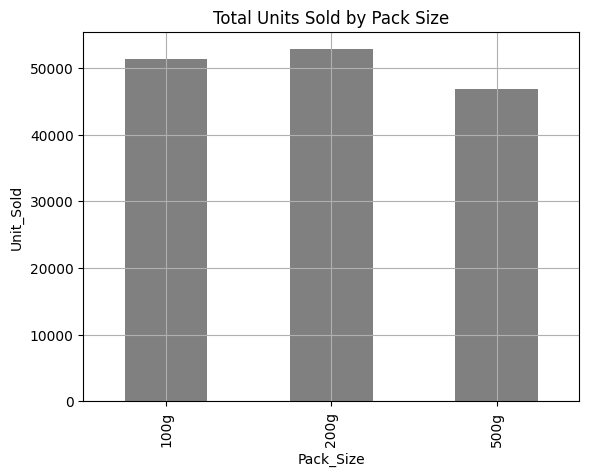

In [ ]:
df.groupby('Pack_Size')['Units_Sold'].sum().plot(kind='bar', color ='gray')
plt.title('Total Units Sold by Pack Size')
plt.xlabel('Pack_Size')
plt.ylabel('Unit_Sold')
plt.grid(True)
plt.show()

